# TAMOJIT ROY - GRIP AUGUST 2021

# TASK-1 (Prediction Using Supervised ML)

# Simple Linear Regression

In this task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple regression task with only two variables. 

## Importing all the necessary libraries: 

In [3]:
!pip install -q sklearn

In [7]:
!pip install tensorflow

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import tensorflow as tf

## Loading the Dataset 

In [12]:
# Load dataset
dataTrain=pd.read_csv(r"https://raw.githubusercontent.com/astrodestroyergithub/Data-Science-and-Business-Analytics-SPARKS/master/student_scores%20-%20student_scores.csv")
dataTrain.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Plotting the dataset to visualize the data provided:

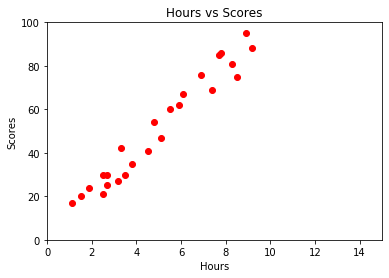

In [13]:
# plot the dataset
plt.plot(dataTrain["Hours"],dataTrain["Scores"], 'ro')
plt.title("Hours vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.axis([0, 15, 0, 100])
plt.show()

## Preparing the data: 

Getting the hours and the score in separate variables.

In [15]:
# getting the scores and hours in separate variables
hours=dataTrain.Hours.to_list()
scores=dataTrain.Scores.to_list()
print(hours)
print(scores)

[2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5, 3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8]
[21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30, 24, 67, 69, 30, 54, 35, 76, 86]


Splitting the data into training and evaluation sets-(We do this using the sklearn.trains_test_split method)

In [16]:
# splitting the data set into training and evaluating variables
h_train,h_test,s_train,s_test=sklearn.model_selection.train_test_split(hours,scores,test_size=0.1)
h_train=np.array(h_train).reshape(-1,1)
h_test=np.array(h_test).reshape(-1,1)

## Training the Model using Linear Regression 

Now we train the model in accordance to a linear regressive environment.

In [17]:
# training the model
linear=linear_model.LinearRegression()
linear.fit(h_train,s_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

After training the model, lets visualize what we have achieved through the process

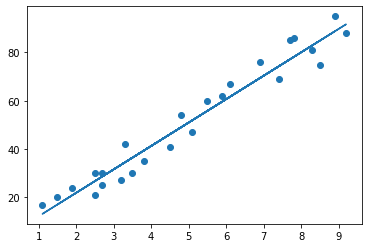

In [19]:
# plotting the regression line
line=linear.coef_*dataTrain["Hours"]+linear.intercept_
plt.scatter(dataTrain["Hours"], dataTrain["Scores"])
plt.plot(dataTrain["Hours"], line)
plt.show()

The coefficients of the above line

In [20]:
# getting the co-efficients of the best fit line
print("Coeff: ",linear.coef_)
print("\nIntercept: ",linear.intercept_)

Coeff:  [9.69929696]

Intercept:  2.4539601473275


# Making predictions: 

Now that we are done with training the model, lets evaluate our model by making predictions using the evaluation dataset provided

In [23]:
# testing dataset
print(h_test)

[[3.3]
 [4.5]
 [7.8]]


Comparing our predictions

In [25]:
# comparing our predictions
s_predict=linear.predict(h_test)
df=pd.DataFrame({'Actual':s_test,"Predicted":s_predict})
print(df)

   Actual  Predicted
0      42  34.461640
1      41  46.100796
2      86  78.108476


Making the prediction for 9.25 hrs a day as specified in the task

In [27]:
# getting the prediction for 9.25 hrs a day
prediction=linear.predict([[9.25]])
print("\nThe predicted score with 9.25 hrs a day is - ",prediction[0])


The predicted score with 9.25 hrs a day is -  92.17245704813746


## Evaluating the accuracy of the model 

We evaluate the accuracy of the model using the evaluation datasets provided

In [28]:
# evaluating the accuracy of the model using the evaluation datasets by finding the variance (1 is the perfect dataset)
print("Variance score: %.2f" % linear.score(h_test,s_test))

Variance score: 0.89
